# Lab2 Visualizations

Second round: last time had some visualizations to check the result of your cleaning. This time, you are gonna implement some yourself.

The objectives of this lab is for you to get:
* data normalization (lab 1 catch-up)
* data aggregation
* pandas/seaborn/pyplot plotting
* create custom graphs (styling, additional info, subplots)

## Reminders
* [GitHub repo](https://github.com/Faur/ITU-Data-Science-in-Games-Exercises)
* **Shut down notebooks** when you are done. Otherwise the server will run out of resources, and we will be forced to restart the them.
* Server storage is volatile! I.e. you must **save everything locally** that you don't want to loose.

In [1]:
# ! git pull

In [2]:
# Makes matplotlib plots work better with Jupyter
%matplotlib inline

# Import the necessary libraries. 
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Check that data and data path is present
# TODO fix path
basedir = "../"
file = "fifa.csv"
assert os.path.isdir(f"{basedir}data") and os.path.exists(f"{basedir}data/{file}"), 'Data not found. Make sure to have the most recent version!'

data = pd.read_csv(f'{basedir}/data/fifa.csv', sep=",")

# Style

First, let us set a modern style for our graphs. Seaborn is almost a standard in scientific papers and data science, so we can sefely rely on its default style. If you have particular needs, or if you think your visualization needs to be improved, you can add entries to the `rc` parameter dictionary (keys in this [sheet](https://matplotlib.org/users/customizing.html#a-sample-matplotlibrc-file))

In [4]:
# set default graph style, just making plots a bit bigger
sns.set(rc={'figure.figsize':(20,8)})

## Task 1: Count and Histogram

> Estimated task time: 20 minutes.

Let's start with analyzing the differences between pyplot, seaborn and pandas (you mar recall from the last lab that the latters build  of the former). They have similar APIs, but the result may be sligtly different

1. Count the number of occurencies of each nationality (look at `DataFrame.groupby` and `DataFrameGroupBy`

2. Plot an histogram of the results

3. Plot the histogram filtering out entries with a count "too small"

4. Plot the histogram showing the top X entries (choose X accordingly)

**Pro tip**: after creating a graph call plt.show() if the cell contains multiple graphs, otherwise all will be rendered on top of each other

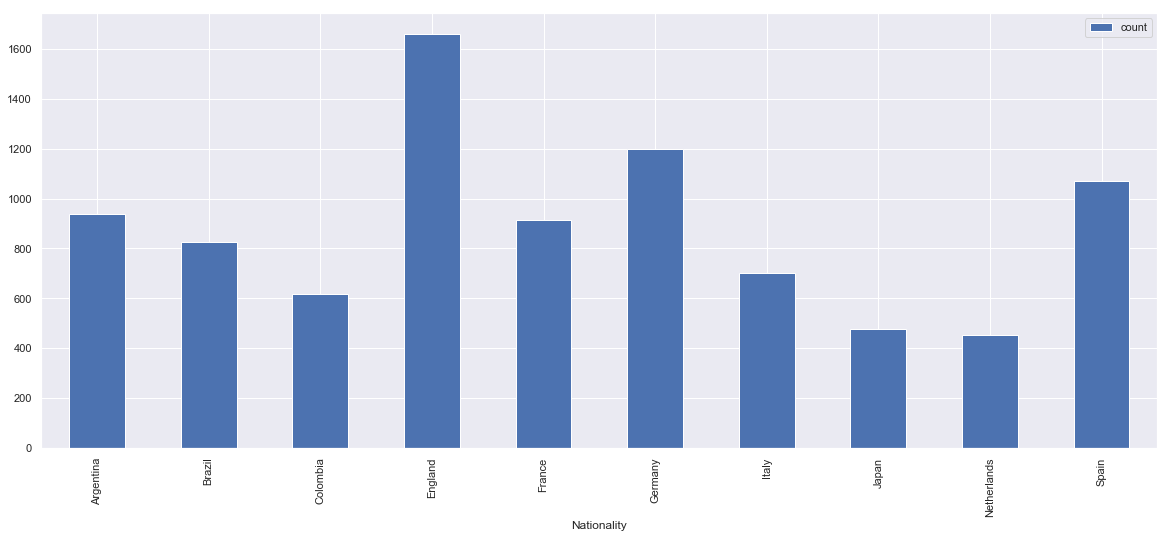

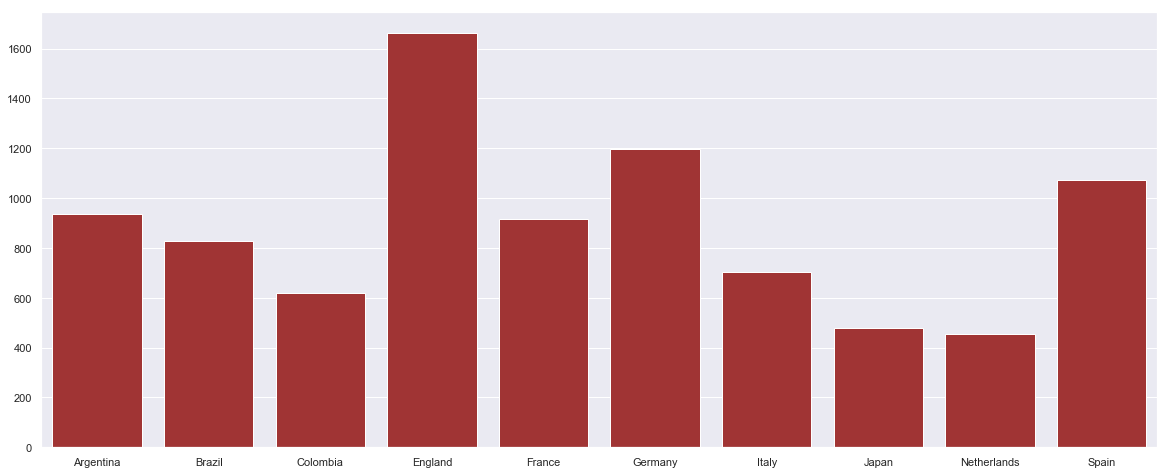

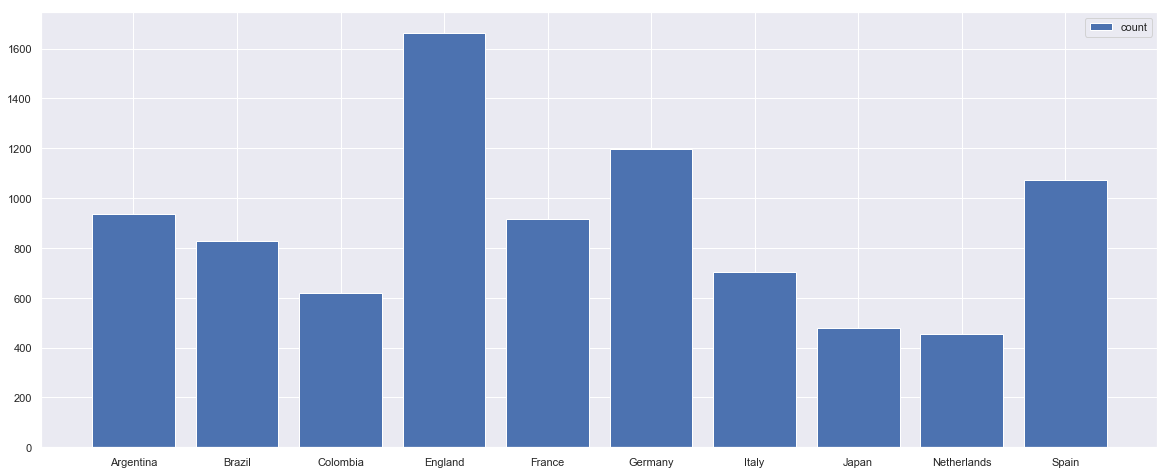

In [5]:
## YOUR CODE HERE 

# 1
# Creates a DF with a Hierarchical index, the only accessible column  is ID
# (for details about comple indexing see https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
gb = data.groupby('Nationality')
natCount = pd.DataFrame({'count': gb.size()})

# Flattens the index
natCount = natCount.reset_index()

# # 3
# natCount = natCount \
#     .sort_values('count', ascending=False) \
#     .head(20)

# 4
natCount = natCount[natCount['count'] > 400]

# 2
# natCount.plot('Nationality', kind='bar', figsize=(20, 8))
natCount.plot('Nationality', kind='bar', figsize=(20, 8))
plt.show() 


sns.barplot(natCount['Nationality'].values, natCount['count'].values, color='firebrick')

plt.show()


plt.bar(natCount['Nationality'].values, natCount['count'].values, label='count')
plt.legend()
plt.show()

# NB: seaborn can group and count the dataset automatically, but doesn't allow to manipulate the resulting dataset
# sns.countplot(data.Nationality, color='red')
# plt.show()

**NB**: matplotlib is 10 years older than pandas, so it can't handle a `DataFrame` directly but needs raw values and series. It is also old in graphical style (at least in the default values).
Is advisable to use pandas visualizations when possible, seaborn when dealing with high-level visualizations, and fall back to matplotlib only when needed (keeping in mind that seaborn can automatically set a modern look to matplotlib visualizations with `seaborn.set()`

## Color palettes

Not all data are categorical. Color is a powerful tool to represent an additional dimension in you visualizations, but can also be very misleading. Seaborn offers many palettes already built for specific situations:
* Categorical: categorical data
* Sequential: numerical or ordinal that can be normalized between [0..1]
* Diverging: numerical or ordinal that can be normalized between [-1..1]

Try to use different palettes in the following graph to see which are useful, which harmful, and why

**NB**: if the color doesn't convey any information, the best thing to do is to use a single one (see default seaborn visualization in last task)

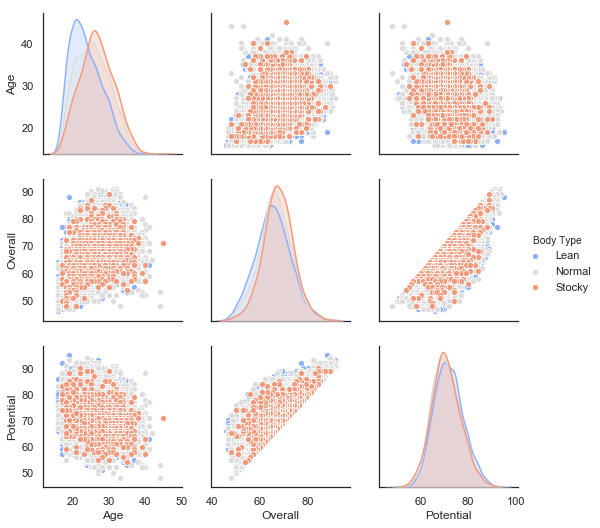

In [6]:
categorical_examples = ['deep', 'colorblind', 'muted']
sequential_examples = ['gray', 'Blues', 'BuGn_r', 'GnBu_d']
diverging_examples = ['coolwarm', 'BrBG', 'RdBu_r']

features = ['Age', 'Overall', 'Potential', 'Body Type']

subset = data[features][(data['Body Type']=='Lean') | (data['Body Type']=='Normal') | (data['Body Type']=='Stocky')]

with sns.axes_style('white'):
    sns.pairplot(subset, hue='Body Type', palette=diverging_examples[0])
plt.show()
    

## Task 2: Multiple data series

> Estimated task time: 15 minutes.

In many occasions is important to correlate data plotting them on the same visualization.

1. Calculate Min/Max/Avg for given features features, grouped by Club

2. Plot an an histogram with all three features

3. Plot a boxplot of the results

This particular set of features is probably not the best to show togheter. Try to understand why and how this problem can be solved.

In [7]:
features = ['GKDiving', 'GKHandling', 'GKKicking']

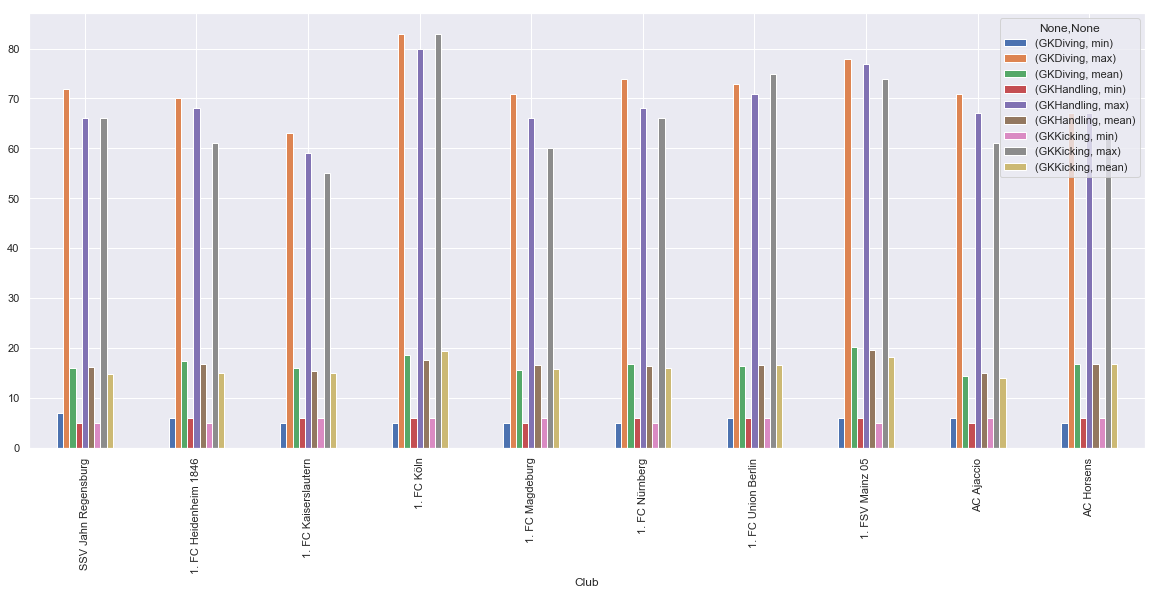

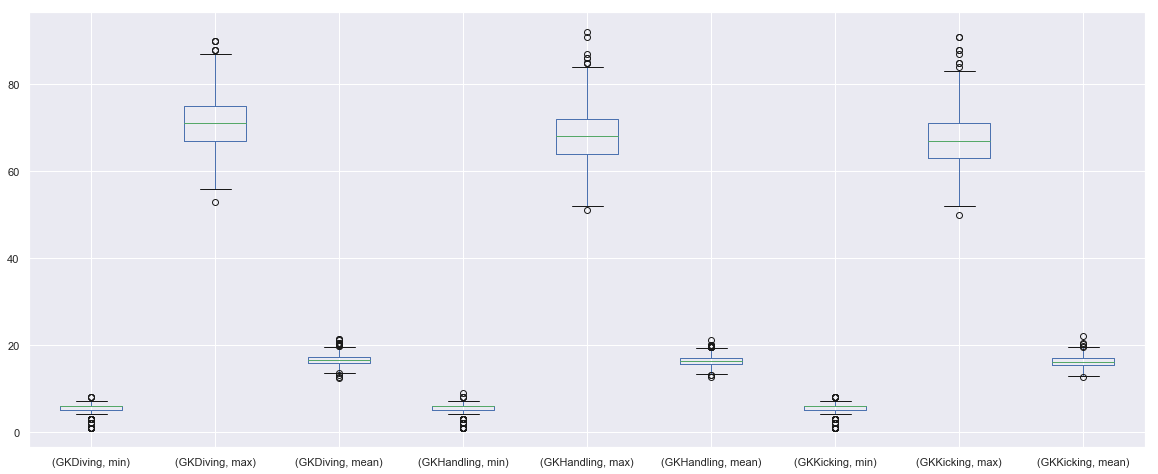

In [8]:
## YOUR CODE HERE

#1
aggregation_columns = ['min', 'max', 'mean']
gb = data.groupby('Club')[features].agg(aggregation_columns)
clubStat = gb.reset_index()

#2
gb \
    .head(10) \
    .plot(kind='bar', figsize=(20, 8))
plt.show()

#3
gb.boxplot(figsize=(20, 8))
plt.show()


## Given code 2: Visualization sins

As you have seen during the lectures, there are many ways to make a "bad" visualization. Here are some examples

In [ ]:
# exotic plots: if your reader can't understand it, don't use it
sns.violinplot(data=gb)
plt.show()

# optimistic regression: [regression is tricky](https://xkcd.com/1725/)

sns.residplot(subset['Overall'], subset['Potential'], lowess=True, color='g')
plt.show()

## Task 3: Statistical analysis and Subplots

> Estimated task time: 15 minutes.

A common task is to analyze datasets statistically. The first step is to plot the distribution of a variable (how many times each value appears) and try to approximate the distribution curve. Seaborn offers automatic ways to visualize this without doing the intermidiate steps ourself:
* Kernel Density Estimation plot (sns.kdeplot) It allows the use of different kernels types [automatic kernel parameter selection](https://en.wikipedia.org/wiki/Kernel_density_estimation#A_rule-of-thumb_bandwidth_estimator)
* Flexible kernel estimation plot (sns.distplot). It has less control over the statistical analysis than KDE but it allows to combine multiple visualizations and other options such binning and so on (see docs for more info)

For the test you should:
1. Show a KDE and a distribution plot
2. Edit the code to show the graphs in a 2x1 grid (last lab showed an example, it's not the only way)

In [10]:
features = ['Crossing', 'Finishing']
values = data[features]

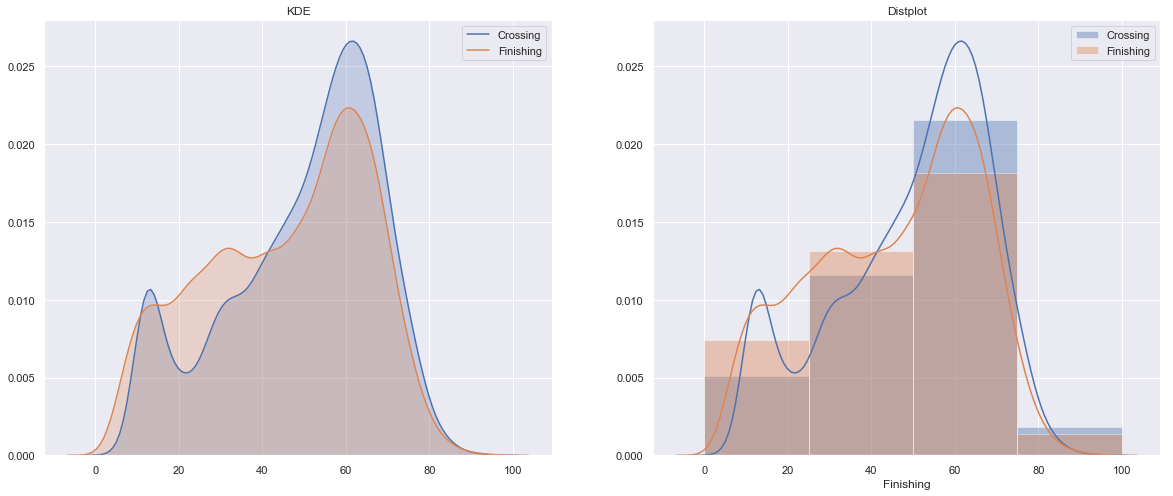

In [11]:
## YOUR CODE HERE

# less obscure than subplot, but limited to same size plots
f, axs = plt.subplots(1, 2)
axs[0].set_title('KDE')
axs[1].set_title('Distplot')

plt.ticklabel_format(style='plain', axis='x')
for i, feature in enumerate(features):
    sns.kdeplot(values[feature].dropna(), shade=True, ax=axs[0])
    
# we don't want the show here, we would destroy the context for the second subgraph
# plt.show()

for feature in features:
    sns.distplot(values[feature].dropna(), ax=axs[1], label=feature, bins=[0, 25, 50, 75, 100])
    plt.legend()
plt.show()

# Plot functions

Extra bonus: there is a list of visualizations that you could find useful for your individual and group excercise. Have fun!

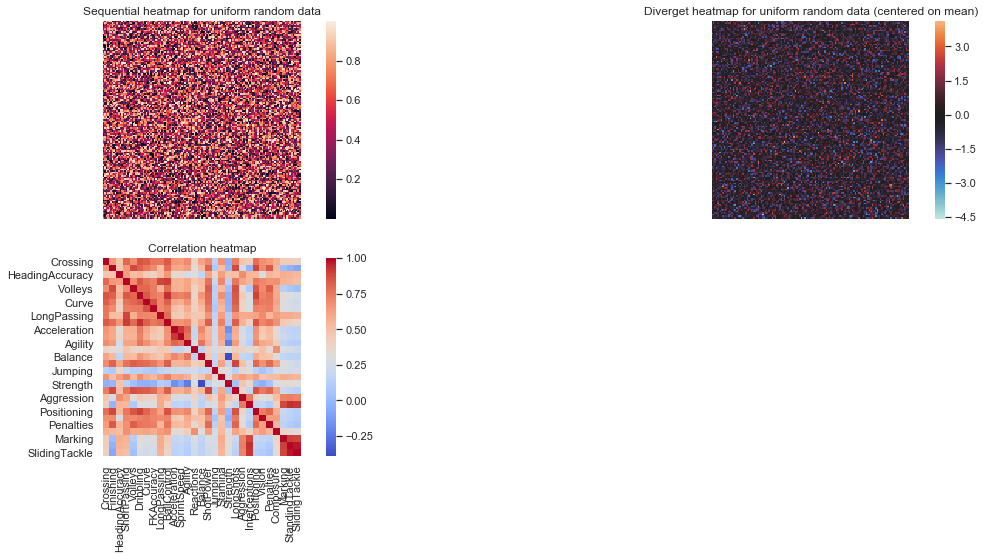

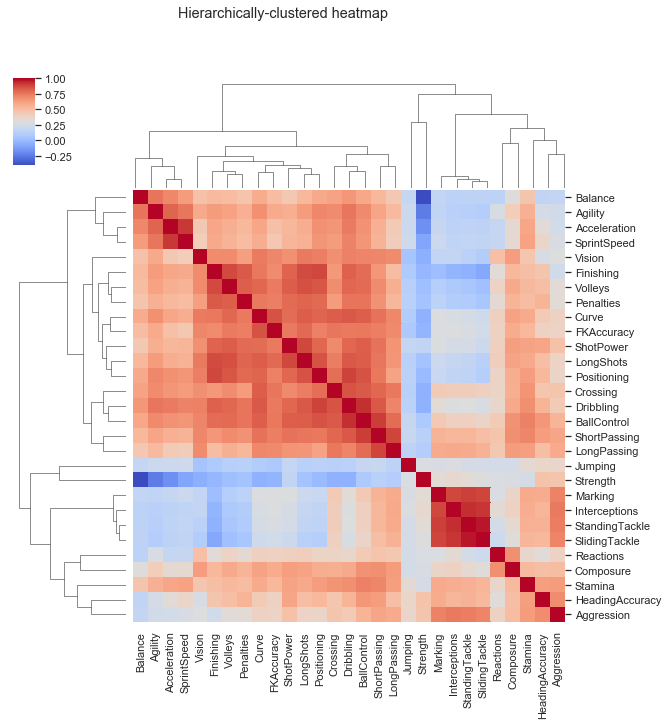

Rendering jointplots (it may take a while)


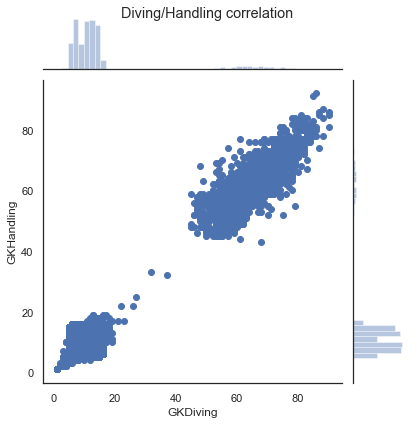

In [22]:
# heatmaps are usefult to represent matrices of values (such as a neural network layer) and functions

plt.subplot(221)
uniform_data = np.random.rand(128, 128)
ax = sns.heatmap(uniform_data, square=True)
ax.set_title('Sequential heatmap for uniform random data')
ax.set(xticklabels=[], yticklabels=[])

plt.subplot(222)
normal_data = np.random.randn(128, 128)
ax = sns.heatmap(normal_data, center=0, square=True)
ax.set_title('Diverget heatmap for uniform random data (centered on mean)')
ax.set(xticklabels=[], yticklabels=[])

plt.subplot(223)
# another use of an heatmap is to show the correlation between variables (calculated with `DataFrame.corr()`)
correlation = data[data.columns.values[54:83]].corr()
ax = sns.heatmap(correlation, cmap=diverging_examples[0], square=True)
ax.set_title('Correlation heatmap')

# Hierarchically-clustered heatmap
g = sns.clustermap(correlation, cmap=diverging_examples[0], square=True)
g.fig.suptitle('Hierarchically-clustered heatmap')
plt.show()


jointplots_kinds= ['scatter', 'kde', 'hex', 'reg']
"""
scatter(default): scatterplot with marginal histograms
kde:  kernel density estimate
hex:  joint histogram
reg:  regression and kernel density estimates
"""

with sns.axes_style('white'):
    g = sns.jointplot('GKDiving', 'GKHandling', data, kind=jointplots_kinds[0])
g.fig.suptitle('Diving/Handling correlation')

plt.show()